In [1]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

**Importing the dataset**

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
## drop the userid and gender columns
df1=df.drop(['User ID','Gender'],axis=1)
df1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [6]:
x=df1[['Age','EstimatedSalary']]
y=df1['Purchased']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [7]:
scaling=StandardScaler()
scaling.fit_transform(x_train,x_test)

array([[ 0.12029041,  0.75432253],
       [-1.12009792,  1.38789585],
       [ 2.02858013, -0.800812  ],
       [ 1.83775116,  0.1207492 ],
       [-0.26136754,  0.06315163],
       [ 0.69277732, -1.37678775],
       [-0.07053857, -0.51282412],
       [-0.64302548, -1.57837926],
       [-0.92926894,  0.49513344],
       [ 0.02487592,  0.29354193],
       [-1.88341381,  0.46633465],
       [-0.26136754, -0.65681806],
       [-0.26136754,  1.09990798],
       [ 1.45609321, -1.0312023 ],
       [-1.31092689, -0.42642776],
       [-0.07053857, -0.22483625],
       [ 0.40653386, -0.16723867],
       [-1.59717035,  0.52393223],
       [ 0.8836063 , -0.5704217 ],
       [-1.12009792, -1.52078169],
       [-0.73843997,  0.49513344],
       [ 0.97902078, -1.17519624],
       [ 1.83775116,  1.503091  ],
       [ 0.12029041,  1.84867645],
       [ 0.31111938,  0.06315163],
       [-0.64302548,  1.38789585],
       [-1.12009792,  0.40873708],
       [-1.88341381,  0.3511395 ],
       [ 0.21570489,

**Fitting K-NN to the Training set**

In [8]:
for i in [1,2,3,4,5,12,13,14,15,16,25]:  ### k= hyperparameter so we will put the value of 'k'
  knn = KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train)))

K value  :  1  train score :  1.0  cv score :  0.8071428571428572
K value  :  2  train score :  0.8964285714285715  cv score :  0.7464285714285714
K value  :  3  train score :  0.8964285714285715  cv score :  0.7714285714285715
K value  :  4  train score :  0.825  cv score :  0.8
K value  :  5  train score :  0.8607142857142858  cv score :  0.7964285714285715
K value  :  12  train score :  0.8107142857142857  cv score :  0.7785714285714287
K value  :  13  train score :  0.825  cv score :  0.775
K value  :  14  train score :  0.8071428571428572  cv score :  0.7750000000000001
K value  :  15  train score :  0.7928571428571428  cv score :  0.7785714285714286
K value  :  16  train score :  0.8107142857142857  cv score :  0.8
K value  :  25  train score :  0.7928571428571428  cv score :  0.7714285714285716


**Predicting the Test set results**

In [9]:
predictions = knn.predict(x_test)


**Making the Confusion Matrix**

In [10]:
matrix1=confusion_matrix(y_test,predictions)
matrix1

array([[74,  7],
       [17, 22]])

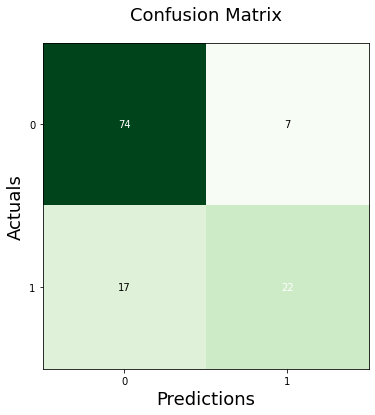

In [11]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matrix1, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()